In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
county_facts = "county_facts.csv"
primary_results = "primary_results.csv"
#primary_inverse = "fips_index.csv"

In [4]:
county_facts_df = pd.read_csv(county_facts, encoding="ISO-8859-1")
primary_results_df = pd.read_csv(primary_results, encoding="ISO-8859-1")
#primary_inverse = pd.read_csv(primary_inverse, encoding="ISO-8859-1")

In [5]:
# County facts dataframe
county_facts_df.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [5]:
#county_facts_df.count()

In [16]:
# Remove all NaN
county_facts_df = county_facts_df.dropna(how='any')

# Set dataframe to show specific columns
county_facts_cleaned_df = county_facts_df[["fips", "area_name", "PST120214", "POP010210", "POP645213", "VET605213", 
                                   "LFE305213", "INC110213", "PVY020213", "SBO001207", "SBO315207", "SBO215207",
                                  "SBO415207", "SBO015207", "MAN450207", "RTN130207", "RTN131207", "BPS030214", 
                                   "LND110210", "POP060210"]]
county_facts_cleaned_df.head()

,fips,area_name,PST120214,POP010210,POP645213,VET605213,LFE305213,INC110213,PVY020213,SBO001207,SBO315207,SBO215207,SBO415207,SBO015207,MAN450207,RTN130207,RTN131207,BPS030214,LND110210,POP060210
2,1001,Autauga County,1.5,54571,1.6,5922,26.2,53682,12.1,4067,15.2,1.3,0.7,31.7,0,598175,12003,131,594.44,91.8
3,1003,Baldwin County,9.8,182265,3.6,19346,25.9,50221,13.9,19035,2.7,1.0,1.3,27.3,1410273,2966489,17166,1384,1589.78,114.6
4,1005,Barbour County,-2.1,27457,2.9,2120,24.6,32911,26.7,1667,0.0,0.0,0.0,27.0,0,188337,6334,8,884.88,31.0
5,1007,Bibb County,-1.8,22915,1.2,1327,27.6,36447,18.1,1385,14.9,0.0,0.0,0.0,0,124707,5804,19,622.58,36.8
6,1009,Blount County,0.7,57322,4.3,4540,33.9,44145,15.8,4458,0.0,0.0,0.0,23.2,341544,319700,5622,3,644.78,88.9


In [17]:
# Rename columns
county_facts_cleaned_df = county_facts_cleaned_df.rename(columns={"area_name":"County", 
                                                  "PST120214":"Population % Change", 
                                                  "POP010210":"2010 Population", 
                                                  "POP645213":"% Foreign Born", 
                                                  "VET605213":"Veterans",
                                                  "LFE305213":"Mean Travel Time", 
                                                  "INC110213":"Median Household Income", 
                                                  "PVY020213":"Below Poverty Level", 
                                                  "SBO001207":"Total Number of Firms", 
                                                  "SBO315207":"% Black-owned Firms", 
                                                  "SBO215207":"% Asian-owned Firms",
                                                  "SBO415207":"% Hispanic-owned Firms", 
                                                  "SBO015207":"% Women-owned Firms", 
                                                  "MAN450207":"Manufacturers Shipments ($1000)", 
                                                  "RTN130207":"Retail Sales ($1000)",
                                                  "RTN131207":"Retail Sales per Capita",
                                                  "BPS030214":"Building permits",
                                                  "LND110210":"Land Area (Square Miles)", 
                                                  "POP060210":"Population per Square Mile"})
county_facts_cleaned_df.head()

,fips,County,Population % Change,2010 Population,% Foreign Born,Veterans,Mean Travel Time,Median Household Income,Below Poverty Level,Total Number of Firms,% Black-owned Firms,% Asian-owned Firms,% Hispanic-owned Firms,% Women-owned Firms,Manufacturers Shipments ($1000),Retail Sales ($1000),Retail Sales per Capita,Building permits,Land Area (Square Miles),Population per Square Mile
2,1001,Autauga County,1.5,54571,1.6,5922,26.2,53682,12.1,4067,15.2,1.3,0.7,31.7,0,598175,12003,131,594.44,91.8
3,1003,Baldwin County,9.8,182265,3.6,19346,25.9,50221,13.9,19035,2.7,1.0,1.3,27.3,1410273,2966489,17166,1384,1589.78,114.6
4,1005,Barbour County,-2.1,27457,2.9,2120,24.6,32911,26.7,1667,0.0,0.0,0.0,27.0,0,188337,6334,8,884.88,31.0
5,1007,Bibb County,-1.8,22915,1.2,1327,27.6,36447,18.1,1385,14.9,0.0,0.0,0.0,0,124707,5804,19,622.58,36.8
6,1009,Blount County,0.7,57322,4.3,4540,33.9,44145,15.8,4458,0.0,0.0,0.0,23.2,341544,319700,5622,3,644.78,88.9


In [18]:
#qqq = pd.pivot_table(county_facts_cleaned_df, values='D', index=['A', 'B'],
#...                     columns=['C'], aggfunc=np.sum)

In [19]:
# Drop all NaN from primary results dataframe
primary_results_df = primary_results_df.dropna(how='any')


In [20]:
# Set dataframe to show specific columns
primary_results_cleaned_df = primary_results_df[["fips", "party", "candidate", "votes", "fraction_votes"]]


In [21]:
# Rename columns
primary_results_cleaned_df = primary_results_cleaned_df.rename(columns={"party":"Party",
                                                                       "candidate":"Candidate",
                                                                       "votes":"Votes",})

In [22]:
len(primary_results_cleaned_df)



24511

In [23]:
primary_results_cleaned_df.head()

,fips,Party,Candidate,Votes,fraction_votes
0,1001.0,Democrat,Bernie Sanders,544,0.182
1,1001.0,Democrat,Hillary Clinton,2387,0.800
2,1003.0,Democrat,Bernie Sanders,2694,0.329
3,1003.0,Democrat,Hillary Clinton,5290,0.647
4,1005.0,Democrat,Bernie Sanders,222,0.078


In [24]:
aaa = primary_results_cleaned_df.set_index('fips')
aaa.head()


,Party,Candidate,Votes,fraction_votes
fips,,,,
1001.0,Democrat,Bernie Sanders,544,0.182
1001.0,Democrat,Hillary Clinton,2387,0.800
1003.0,Democrat,Bernie Sanders,2694,0.329
1003.0,Democrat,Hillary Clinton,5290,0.647
1005.0,Democrat,Bernie Sanders,222,0.078


In [25]:
aaaa = pd.pivot_table(aaa, values= ["Votes", "Party"], index=['fips'], columns=["Candidate"], fill_value=0)
aaaa.head()

Votes                                                       \
Candidate  No Preference  Uncommitted Ben Carson Bernie Sanders Carly Fiorina   
fips                                                                            
1001.0                 0            0       1764            544             0   
1003.0                 0            0       4221           2694             0   
1005.0                 0            0        417            222             0   
1007.0                 0            0        393            246             0   
1009.0                 0            0       1523            395             0   

                                                                            \
Candidate Chris Christie Donald Trump Hillary Clinton Jeb Bush John Kasich   
fips                                                                         
1001.0                 0         5387            2387        0         421   
1003.0                 0        23618            5290        0        2987   
1005.0                 0         1710            2567        0         123   
1007.0                 0         1959             942        0          84   
1009.0                 0         7390             564        0         337   

                                                                             \
Candidate Marco Rubio Martin O'Malley Mike Huckabee Rand Paul Rick Santorum   
fips                                                                          
1001.0           1785               0             0         0             0   
1003.0           9703               0             0         0             0   
1005.0            498               0             0         0             0   
1007.0            444               0             0         0             0   
1009.0           1843               0             0         0             0   

                    
Candidate Ted Cruz  
fips                
1001.0        2482  
1003.0        8571  
1005.0         609  
1007.0        1011  
1009.0        3698

In [26]:
len(aaaa)

4207

In [43]:
aaaa.sum()



       Candidate      
Votes   No Preference         8152
        Uncommitted             43
       Ben Carson           558044
       Bernie Sanders     11807518
       Carly Fiorina          3485
       Chris Christie         3284
       Donald Trump       13202135
       Hillary Clinton    15597200
       Jeb Bush              63101
       John Kasich         4115040
       Marco Rubio         3291044
       Martin O'Malley         752
       Mike Huckabee          3345
       Rand Paul              8479
       Rick Santorum          1782
       Ted Cruz            7569817
dtype: int64

In [18]:
#fips_merge_df = pd.merge(county_facts_cleaned_df, primary_results_cleaned_df, on="fips")


In [19]:
#len(fips_merge_df)

In [20]:
#fips_merge_df

In [21]:
#fips_merge_df.to_csv("training_data.csv", index=False, header=True)

In [22]:
#primary_results_df.head()

In [23]:
# primary_results_sorted = primary_results_df.sort_values(["fips", "votes"], ascending=True)
# primary_results_sorted.head()

In [31]:
len(primary_results_cleaned_df["Candidate"].unique())

16

In [25]:
# primary_results_alabama_df = primary_results_df.loc[primary_results_df["state"] == "Alabama", :]
# primary_results_republican_df = primary_results_df.loc[primary_results_df["party"] == "Republican", :]
# primary_results_democrat_df = primary_results_df.loc[primary_results_df["party"] == "Democrat", :]
# primary_results_democrat_df.head()
# primary_results_democrat_sorted = primary_results_democrat_df.sort_values(["fips", "votes"], ascending=True)
# primary_results_democrat_sorted = primary_results_democrat_sorted.sort_values(["fips"], ascending=True)
# 8959 rows
# primary_results_democrat_sorted.nlargest(keep="last")
# primary_results_democrat_df.nlargest(100, ["fips", "votes"], keep="first")

In [26]:
#merge_02 = county_facts_cleaned.merge(primary_inverse, )

In [32]:
merge_02 = pd.merge(county_facts_cleaned_df, aaaa, left_on="fips", right_index=True)
merge_02.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,fips,County,Population % Change,2010 Population,% Foreign Born,Veterans,Mean Travel Time,Median Household Income,Below Poverty Level,Total Number of Firms,...,"(Votes, Donald Trump)","(Votes, Hillary Clinton)","(Votes, Jeb Bush)","(Votes, John Kasich)","(Votes, Marco Rubio)","(Votes, Martin O'Malley)","(Votes, Mike Huckabee)","(Votes, Rand Paul)","(Votes, Rick Santorum)","(Votes, Ted Cruz)"
2,1001,Autauga County,1.5,54571,1.6,5922,26.2,53682,12.1,4067,...,5387,2387,0,421,1785,0,0,0,0,2482
3,1003,Baldwin County,9.8,182265,3.6,19346,25.9,50221,13.9,19035,...,23618,5290,0,2987,9703,0,0,0,0,8571
4,1005,Barbour County,-2.1,27457,2.9,2120,24.6,32911,26.7,1667,...,1710,2567,0,123,498,0,0,0,0,609
5,1007,Bibb County,-1.8,22915,1.2,1327,27.6,36447,18.1,1385,...,1959,942,0,84,444,0,0,0,0,1011
6,1009,Blount County,0.7,57322,4.3,4540,33.9,44145,15.8,4458,...,7390,564,0,337,1843,0,0,0,0,3698


In [33]:
merge_02.columns


Index([                           'fips',                          'County',
                   'Population % Change',                 '2010 Population',
                        '% Foreign Born',                        'Veterans',
                      'Mean Travel Time',         'Median Household Income',
                   'Below Poverty Level',           'Total Number of Firms',
                   '% Black-owned Firms',             '% Asian-owned Firms',
                '% Hispanic-owned Firms',             '% Women-owned Firms',
       'Manufacturers Shipments ($1000)',            'Retail Sales ($1000)',
               'Retail Sales per Capita',                'Building permits',
              'Land Area (Square Miles)',      'Population per Square Mile',
             ('Votes', ' No Preference'),         ('Votes', ' Uncommitted'),
                 ('Votes', 'Ben Carson'),       ('Votes', 'Bernie Sanders'),
              ('Votes', 'Carly Fiorina'),       ('Votes', 'Chris Christie'),

In [34]:
final_clean = merge_02.drop(columns=['County'])
final_clean.head()

,fips,Population % Change,2010 Population,% Foreign Born,Veterans,Mean Travel Time,Median Household Income,Below Poverty Level,Total Number of Firms,% Black-owned Firms,...,"(Votes, Donald Trump)","(Votes, Hillary Clinton)","(Votes, Jeb Bush)","(Votes, John Kasich)","(Votes, Marco Rubio)","(Votes, Martin O'Malley)","(Votes, Mike Huckabee)","(Votes, Rand Paul)","(Votes, Rick Santorum)","(Votes, Ted Cruz)"
2,1001,1.5,54571,1.6,5922,26.2,53682,12.1,4067,15.2,...,5387,2387,0,421,1785,0,0,0,0,2482
3,1003,9.8,182265,3.6,19346,25.9,50221,13.9,19035,2.7,...,23618,5290,0,2987,9703,0,0,0,0,8571
4,1005,-2.1,27457,2.9,2120,24.6,32911,26.7,1667,0.0,...,1710,2567,0,123,498,0,0,0,0,609
5,1007,-1.8,22915,1.2,1327,27.6,36447,18.1,1385,14.9,...,1959,942,0,84,444,0,0,0,0,1011
6,1009,0.7,57322,4.3,4540,33.9,44145,15.8,4458,0.0,...,7390,564,0,337,1843,0,0,0,0,3698


In [35]:
# Rename columns
merge_clean = final_clean.rename(columns={"('Votes', ' No Preference')": "No Pref",
                                       "('Votes', ' Uncommitted')": "Uncommitted",
                                       "('Votes', 'Ben Carson')": "Ben Carson",
                                       "('Votes', 'Bernie Sanders')": "Bernie Sanders",
                                       "('Votes', 'Carly Fiorina')": "Carly Fiorina",  
                                       "('Votes', 'Chris Christie')": "Chris Christie",
                                       "('Votes', 'Donald Trump')": "Donald Trump",
                                       "('Votes', 'Hillary Clinton')": "Hillary Clinton",
                                       "('Votes', 'Jeb Bush')":"Jeb Bush",       
                                       "('Votes', 'John Kasich')": "John Kasich",
                                       "('Votes', 'Marco Rubio')": "Marco Rubio",     
                                       "('Votes', 'Martin O'Malley')": "Martin O'Malley",
                                       "('Votes', 'Mike Huckabee')": "Mike Huckabee", 
                                       "('Votes', 'Rand Paul')": "Rand Paul",
                                       "('Votes', 'Rick Santorum')": "Rick Santorum",   
                                       "('Votes', 'Ted Cruz')": "Ted Cruz"})
merge_clean.head()

,fips,Population % Change,2010 Population,% Foreign Born,Veterans,Mean Travel Time,Median Household Income,Below Poverty Level,Total Number of Firms,% Black-owned Firms,...,"(Votes, Donald Trump)","(Votes, Hillary Clinton)","(Votes, Jeb Bush)","(Votes, John Kasich)","(Votes, Marco Rubio)","(Votes, Martin O'Malley)","(Votes, Mike Huckabee)","(Votes, Rand Paul)","(Votes, Rick Santorum)","(Votes, Ted Cruz)"
2,1001,1.5,54571,1.6,5922,26.2,53682,12.1,4067,15.2,...,5387,2387,0,421,1785,0,0,0,0,2482
3,1003,9.8,182265,3.6,19346,25.9,50221,13.9,19035,2.7,...,23618,5290,0,2987,9703,0,0,0,0,8571
4,1005,-2.1,27457,2.9,2120,24.6,32911,26.7,1667,0.0,...,1710,2567,0,123,498,0,0,0,0,609
5,1007,-1.8,22915,1.2,1327,27.6,36447,18.1,1385,14.9,...,1959,942,0,84,444,0,0,0,0,1011
6,1009,0.7,57322,4.3,4540,33.9,44145,15.8,4458,0.0,...,7390,564,0,337,1843,0,0,0,0,3698


In [36]:
merge_clean.columns

Index([                           'fips',             'Population % Change',
                       '2010 Population',                  '% Foreign Born',
                              'Veterans',                'Mean Travel Time',
               'Median Household Income',             'Below Poverty Level',
                 'Total Number of Firms',             '% Black-owned Firms',
                   '% Asian-owned Firms',          '% Hispanic-owned Firms',
                   '% Women-owned Firms', 'Manufacturers Shipments ($1000)',
                  'Retail Sales ($1000)',         'Retail Sales per Capita',
                      'Building permits',        'Land Area (Square Miles)',
            'Population per Square Mile',       ('Votes', ' No Preference'),
               ('Votes', ' Uncommitted'),           ('Votes', 'Ben Carson'),
             ('Votes', 'Bernie Sanders'),        ('Votes', 'Carly Fiorina'),
             ('Votes', 'Chris Christie'),         ('Votes', 'Donald Trump'),

In [37]:
clean = merge_clean.set_index('fips')
clean.head()

,Population % Change,2010 Population,% Foreign Born,Veterans,Mean Travel Time,Median Household Income,Below Poverty Level,Total Number of Firms,% Black-owned Firms,% Asian-owned Firms,...,"(Votes, Donald Trump)","(Votes, Hillary Clinton)","(Votes, Jeb Bush)","(Votes, John Kasich)","(Votes, Marco Rubio)","(Votes, Martin O'Malley)","(Votes, Mike Huckabee)","(Votes, Rand Paul)","(Votes, Rick Santorum)","(Votes, Ted Cruz)"
fips,,,,,,,,,,,,,,,,,,,,,
1001,1.5,54571,1.6,5922,26.2,53682,12.1,4067,15.2,1.3,...,5387,2387,0,421,1785,0,0,0,0,2482
1003,9.8,182265,3.6,19346,25.9,50221,13.9,19035,2.7,1.0,...,23618,5290,0,2987,9703,0,0,0,0,8571
1005,-2.1,27457,2.9,2120,24.6,32911,26.7,1667,0.0,0.0,...,1710,2567,0,123,498,0,0,0,0,609
1007,-1.8,22915,1.2,1327,27.6,36447,18.1,1385,14.9,0.0,...,1959,942,0,84,444,0,0,0,0,1011
1009,0.7,57322,4.3,4540,33.9,44145,15.8,4458,0.0,0.0,...,7390,564,0,337,1843,0,0,0,0,3698


In [33]:
clean.to_csv("nobetter.csv", index=False, header=True)

In [34]:
#primary_inverse = primary_results_df[["fips", "candidate", "votes"]]

In [38]:
clean.corr()

,Population % Change,2010 Population,% Foreign Born,Veterans,Mean Travel Time,Median Household Income,Below Poverty Level,Total Number of Firms,% Black-owned Firms,% Asian-owned Firms,...,"(Votes, Donald Trump)","(Votes, Hillary Clinton)","(Votes, Jeb Bush)","(Votes, John Kasich)","(Votes, Marco Rubio)","(Votes, Martin O'Malley)","(Votes, Mike Huckabee)","(Votes, Rand Paul)","(Votes, Rick Santorum)","(Votes, Ted Cruz)"
Population % Change,1.000000,0.246104,0.367901,0.301483,0.059033,0.482253,-0.262142,0.233804,0.015319,0.290292,...,0.277413,0.193298,0.099970,0.152422,0.301811,0.035155,0.027714,0.056880,0.033328,0.320454
2010 Population,0.246104,1.000000,0.485436,0.920051,0.126578,0.253549,-0.075149,0.980022,0.171018,0.522068,...,0.838469,0.922451,0.034693,0.506288,0.421094,0.006741,0.003128,0.011937,0.001713,0.582407
% Foreign Born,0.367901,0.485436,1.000000,0.444591,0.016997,0.356789,-0.060741,0.485555,0.088996,0.537984,...,0.390376,0.456411,0.007880,0.206257,0.311507,0.008937,-0.004101,0.008282,0.003990,0.255750
Veterans,0.301483,0.920051,0.444591,1.000000,0.116114,0.296545,-0.118793,0.863480,0.189402,0.521261,...,0.901763,0.812823,0.062956,0.558107,0.472575,0.006820,0.001840,0.013158,0.000755,0.652161
Mean Travel Time,0.059033,0.126578,0.016997,0.116114,1.000000,0.176186,-0.039580,0.124527,0.121267,0.140689,...,0.135080,0.133900,-0.004865,0.059433,0.078940,-0.052375,-0.077387,-0.063742,-0.082179,0.066067
Median Household Income,0.482253,0.253549,0.356789,0.296545,0.176186,1.000000,-0.760644,0.251392,-0.036855,0.383492,...,0.328803,0.225690,0.012973,0.267244,0.177531,0.044675,0.051488,0.053439,0.058205,0.263814
Below Poverty Level,-0.262142,-0.075149,-0.060741,-0.118793,-0.039580,-0.760644,1.000000,-0.080411,0.211907,-0.119778,...,-0.164401,-0.048342,-0.003238,-0.139341,-0.069557,-0.057973,-0.068961,-0.050316,-0.073504,-0.141694
Total Number of Firms,0.233804,0.980022,0.485555,0.863480,0.124527,0.251392,-0.080411,1.000000,0.152009,0.495786,...,0.796499,0.919427,0.029641,0.471035,0.448589,0.005237,0.001887,0.009115,0.000426,0.527953
% Black-owned Firms,0.015319,0.171018,0.088996,0.189402,0.121267,-0.036855,0.211907,0.152009,1.000000,0.186990,...,0.133692,0.241758,0.085124,0.108885,0.180644,-0.019228,-0.027393,-0.018210,-0.027401,0.137732
% Asian-owned Firms,0.290292,0.522068,0.537984,0.521261,0.140689,0.383492,-0.119778,0.495786,0.186990,1.000000,...,0.437689,0.488089,0.023083,0.266696,0.236225,-0.005870,-0.009645,0.001255,-0.009345,0.277660


In [39]:
import seaborn


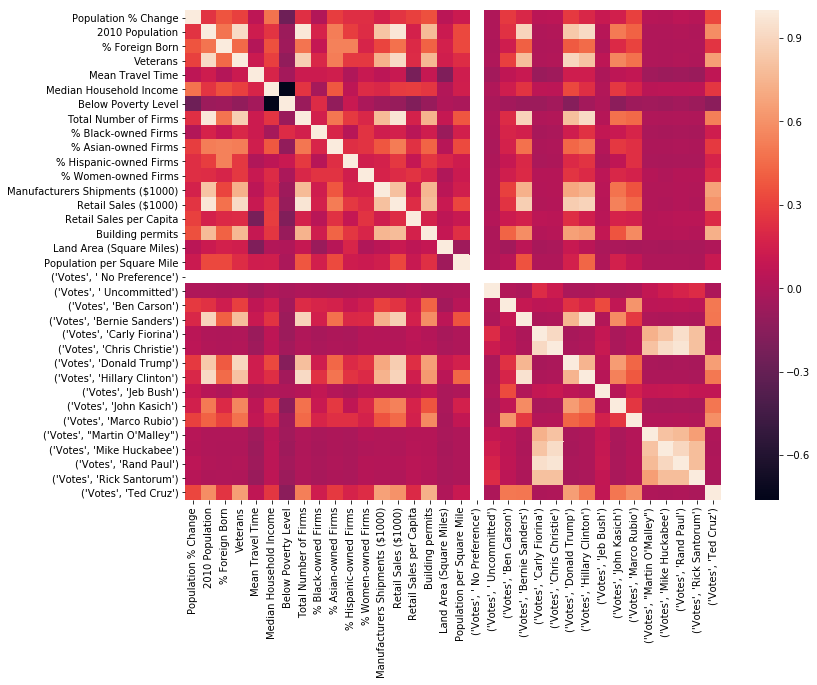

In [40]:
fig, ax=plt.subplots(figsize=(12,9))
seaborn.heatmap(clean.corr(), ax=ax)
plt.savefig('corr-matrix.png')